In [123]:
# import dependencies
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [22]:
# Create 8 dataframes, one for each .csv file
df1 = pd.read_csv('2018_01_01 to 2018_02_28.csv')
df2 = pd.read_csv('2018_03_01 to 2018_09_30.csv')
df3 = pd.read_csv('2018_10_01 to 2019_05_31.csv')
df4 = pd.read_csv('2019_06_01 to 2019_12_31.csv')
df5 = pd.read_csv('2020_01_01 to 2020_07_31.csv')
df6 = pd.read_csv('2020_08_01 to 2021_02_28.csv')
df7 = pd.read_csv('2021_03_01 to 2021_08_31.csv')
df8 = pd.read_csv('2021_09_01 to 2022_04_20.csv')

# Create a list of our 8 dataframes
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]

master_data = pd.concat(df_list, ignore_index=True)
# master_data.tail()
master_data.to_csv('CountyMasterFile.csv')

## Read in the data

In [2]:
full_df = pd.read_csv('CountyMasterFile.csv')
full_df.head()

,Unnamed: 0,County,Status,Area,Sub,City,Postal Code,Sold Price,OLP,List Price,...,Baths Half,Structure,Property Type,Property Subtype,OnMktDate,OMD,Clsd Date,Elem Schl,Middle Schl,High Schl
0,0,Cherokee,Sold,113 - CHK3,Longleaf Woodstock,Woodstock,30188,499957,475900,475900,...,0,NaN,Residential,Single Family Residence,10/20/2017,11/2/2017,2/28/2018,Little River Primary/Elementar,Mill Creek,River Ridge
1,1,Cherokee,Sold,113 - CHK3,None,Canton,30115-7057,575000,600000,600000,...,1,NaN,Residential,Single Family Residence,10/9/2017,11/26/2017,1/5/2018,Avery,Creekland,Creekview
2,2,Cherokee,Sold,113 - CHK3,None,Canton,30115-6577,130600,155000,149900,...,1,NaN,Residential,Single Family Residence,11/3/2017,1/5/2018,1/30/2018,Avery,Creekland,Creekview
3,3,Cherokee,Sold,113 - CHK3,Twin Lakes,Woodstock,30188,320000,350000,325000,...,1,NaN,Residential,Single Family Residence,9/7/2017,11/16/2017,1/3/2018,Mountain Road,Dean Rusk,Sequoyah
4,4,Cherokee,Sold,113 - CHK3,Cherokee Reserve,Canton,30115-4760,305000,310000,305000,...,0,NaN,Residential,Single Family Residence,9/14/2017,1/18/2018,2/27/2018,Hickory Flat,Dean Rusk,Sequoyah


## Cleaning begins...

In [3]:
# Start here. Read in the master file and drop the first column, which is a kind of duplicate
# index column.
full_df = pd.read_csv('CountyMasterFile.csv')
full_df.drop(columns=['Unnamed: 0', 'County', 'Structure', 'Lot'], inplace=True)
full_df.head()

,Status,Area,Sub,City,Postal Code,Sold Price,OLP,List Price,Price,DOM,...,Baths Full,Baths Half,Property Type,Property Subtype,OnMktDate,OMD,Clsd Date,Elem Schl,Middle Schl,High Schl
0,Sold,113 - CHK3,Longleaf Woodstock,Woodstock,30188,499957,475900,475900,499957,13,...,3,0,Residential,Single Family Residence,10/20/2017,11/2/2017,2/28/2018,Little River Primary/Elementar,Mill Creek,River Ridge
1,Sold,113 - CHK3,None,Canton,30115-7057,575000,600000,600000,575000,48,...,5,1,Residential,Single Family Residence,10/9/2017,11/26/2017,1/5/2018,Avery,Creekland,Creekview
2,Sold,113 - CHK3,None,Canton,30115-6577,130600,155000,149900,130600,63,...,1,1,Residential,Single Family Residence,11/3/2017,1/5/2018,1/30/2018,Avery,Creekland,Creekview
3,Sold,113 - CHK3,Twin Lakes,Woodstock,30188,320000,350000,325000,320000,70,...,2,1,Residential,Single Family Residence,9/7/2017,11/16/2017,1/3/2018,Mountain Road,Dean Rusk,Sequoyah
4,Sold,113 - CHK3,Cherokee Reserve,Canton,30115-4760,305000,310000,305000,305000,67,...,3,0,Residential,Single Family Residence,9/14/2017,1/18/2018,2/27/2018,Hickory Flat,Dean Rusk,Sequoyah


In [4]:
# Now I need to clean the dataset from potential 'fat-finger' typos, which have the effect
# of massive discrepancies between the original list price and the sales.

# Create a column that calculates the 'delta' between the original list price ('OLP') and the
# Sold Price, with the latter being a percentage of the former.
full_df['delta'] = full_df['Sold Price']/full_df['OLP']*100

# show the smallest deltas to see where a natural cutoff would be to simply drop values. As shown
# by the below smallest 22 values, it appears I should drop the bottom 19 values, or all rows
# where 'delta' is less than 28%.
full_df['delta'].sort_values(ascending=True).head(22)

6626      0.091587
13645     0.097361
17655     0.100000
18273     0.101227
9193      0.110873
7877      1.018213
10861     8.548791
18899     9.090909
5919      9.548059
383       9.578947
875       9.979541
16833    10.000000
2636     10.003031
11941    10.092521
12641    10.128492
12767    10.137976
17382    10.246721
17883    10.367816
10017    10.433333
13811    28.643216
11160    31.446541
10940    38.491147
Name: delta, dtype: float64

In [5]:
# We'll start by dropping all rows with delta values below minus 500%. We'll create a new
# 'version' of the dataframe as we go along, naming it an intermediate1 dataframe, or int1_df,
# for short. At each cleaning step, we'll increment the int_df by one, just so we create a 
# new copy each time until we finally arrive at a final cleaned dataframe.
int1_df = full_df.loc[full_df['delta'] > 28, :]
len(int1_df)

20316

In [6]:
# By sorting in the opposite direction, I can see there's a big difference in delta values in the
# positive direction when I sort descending, i.e., largest first. Based on the 25 largest values,
# we'll drop all values with a delta value larger than 300%.
int1_df['delta'].sort_values(ascending=False).head(25)

18847    120000.000000
14632    100000.000000
7043      97674.418605
11805     94795.539033
1090      94032.258065
7861      12833.333333
19881     10507.120528
13897      1072.000000
15873      1003.861004
84          982.456140
7238        969.557289
7177        926.229508
8382        925.704210
12414       909.090909
3413        846.560847
19815       236.722307
16066       231.114177
15074       181.746032
6607        181.095890
479         170.000000
12791       169.090909
19413       167.583792
2924        166.666667
18276       162.337662
10323       160.740741
Name: delta, dtype: float64

In [7]:
# Finally, our new dataframe, 'clean_df', will only feature rows with a corresponding delta value
# less than 300%.
int2_df = int1_df.loc[int1_df['delta'] < 300, :]
len(int2_df)

20301

In [8]:
# Explore the dataset by using the describe() method. Immediately, I notice that the 'DOM' column
# has a couple problems, with a min value of -77. Since that column measures Days On Market, 
# this should only be a minimum of 0, with no negative values.
int2_df.describe()

,Sold Price,OLP,List Price,Price,DOM,Lot Size Acres,Ttl Fin Ar,Year Blt,Beds,Baths Full,Baths Half,delta
count,2.030100e+04,2.030100e+04,2.030100e+04,2.030100e+04,20301.000000,19005.000000,20301.000000,20297.000000,20301.000000,20301.000000,20301.000000,20301.000000
mean,3.551218e+05,3.612302e+05,3.574733e+05,3.551195e+05,33.595537,35.144834,2290.050244,2001.729763,3.746466,2.621546,0.564455,98.786454
std,1.864104e+05,2.101470e+05,2.032690e+05,1.864139e+05,54.149340,2018.428223,1638.954313,14.967177,0.983110,0.895345,0.556596,6.164692
min,3.000000e+03,2.500000e+03,2.500000e+03,3.000000e+03,-77.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,28.643216
25%,2.500000e+05,2.519000e+05,2.500000e+05,2.500000e+05,4.000000,0.144000,1501.000000,1994.000000,3.000000,2.000000,0.000000,96.463023
50%,3.180000e+05,3.216100e+05,3.199000e+05,3.180000e+05,11.000000,0.331000,2147.000000,2004.000000,4.000000,2.000000,1.000000,99.587544
75%,4.120000e+05,4.194440e+05,4.149000e+05,4.120000e+05,41.000000,0.625000,2964.000000,2014.000000,4.000000,3.000000,1.000000,101.149425
max,9.250000e+06,1.350000e+07,1.350000e+07,9.250000e+06,1044.000000,250125.000000,59246.000000,2022.000000,9.000000,14.000000,10.000000,236.722307


In [188]:
# Instead of dropping any values with negative DOM values, I'll create a new column called 
# 'DOM_actual' where I'll subtract 'OMD' (off market date) from 'OnMtDate' to get the real number
# of days inbetween the date when it was taken off the market from when it was first listed.

# But first, cast these 2 columns as datetime64 variables so we can perform the operation.
int3_df = int2_df.copy()
int3_df["OnMktDate"] =  int2_df["OnMktDate"].astype('datetime64[ns]')
int3_df["OMD"] =  int2_df["OMD"].astype('datetime64[ns]')
int3_df["Clsd Date"] =  int2_df["Clsd Date"].astype('datetime64[ns]')

int3_df['DOM_actual'] = (int3_df["OMD"] - int3_df["OnMktDate"]).dt.days
int3_df.describe()

,Sold Price,OLP,List Price,Price,DOM,Lot Size Acres,Ttl Fin Ar,Year Blt,Beds,Baths Full,Baths Half,delta,DOM_actual
count,2.030100e+04,2.030100e+04,2.030100e+04,2.030100e+04,20301.000000,19005.000000,20301.000000,20297.000000,20301.000000,20301.000000,20301.000000,20301.000000,20301.000000
mean,3.551218e+05,3.612302e+05,3.574733e+05,3.551195e+05,33.595537,35.144834,2290.050244,2001.729763,3.746466,2.621546,0.564455,98.786454,35.915374
std,1.864104e+05,2.101470e+05,2.032690e+05,1.864139e+05,54.149340,2018.428223,1638.954313,14.967177,0.983110,0.895345,0.556596,6.164692,56.324708
min,3.000000e+03,2.500000e+03,2.500000e+03,3.000000e+03,-77.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,28.643216,-77.000000
25%,2.500000e+05,2.519000e+05,2.500000e+05,2.500000e+05,4.000000,0.144000,1501.000000,1994.000000,3.000000,2.000000,0.000000,96.463023,4.000000
50%,3.180000e+05,3.216100e+05,3.199000e+05,3.180000e+05,11.000000,0.331000,2147.000000,2004.000000,4.000000,2.000000,1.000000,99.587544,13.000000
75%,4.120000e+05,4.194440e+05,4.149000e+05,4.120000e+05,41.000000,0.625000,2964.000000,2014.000000,4.000000,3.000000,1.000000,101.149425,45.000000
max,9.250000e+06,1.350000e+07,1.350000e+07,9.250000e+06,1044.000000,250125.000000,59246.000000,2022.000000,9.000000,14.000000,10.000000,236.722307,1044.000000


In [189]:
# There are still negative values for our 'DOM_actual' column, so we'll just drop these rows
# completely from the dataset by creating a new, slimmer dataframe ('int4_df')
int4_df = int3_df.copy()
int4_df = int4_df.loc[int4_df['DOM_actual'] >= 0]
len(int4_df)

20291

In [190]:
# One final block of code for data cleaning. No such school named 'Centre' in in the county's
# school system, so we'll drop the one row that has a middle and elementary school by this name.
int4_df = int4_df[int4_df['Elem Schl'] != 'Centre']

# next, check to see which remaining dataframe columns contain Nan values. As shown, only
# the 'Sub' and 'Lot Size Acres' columns contain null values. So, we'll drop rows in the dataframe
# that have nan values
int4_df.isna().sum()

Status                 0
Area                   0
Sub                   43
City                   0
Postal Code            0
Sold Price             0
OLP                    0
List Price             0
Price                  0
DOM                    0
Lot Size Acres      1295
Ttl Fin Ar             0
Year Blt               4
Beds                   0
Baths Full             0
Baths Half             0
Property Type          0
Property Subtype       0
OnMktDate              0
OMD                    0
Clsd Date              0
Elem Schl              0
Middle Schl            0
High Schl              0
delta                  0
DOM_actual             0
dtype: int64

In [191]:
# Drop all nan values, and run the 'isna().sum' again to check for any nan values. All gone!
int4_df.dropna(inplace=True)
# int4_df.isna().sum()
len(int4_df)

18952

In [192]:
# We also want to drop all rows that contain the value "Other" from either the High, Middle, or
# elementary schools
int5_df = int4_df.loc[int4_df['High Schl'] != 'Other']
int6_df = int5_df.loc[int4_df['Middle Schl'] != 'Other']
int7_df = int6_df.loc[int4_df['Elem Schl'] != 'Other']

len(int7_df)

18737

In [392]:
# The final data cleaning step is to rename all Elementary School with the value "Canton" 
# to "Hasty" and "Little River Primary/Elementar" to just "Little River"
dict1 = {"Canton": "Hasty",
        "Little River Primary/Elementar": "Little River"}
int8_df = int7_df.replace({"Elem Schl": dict1})

int8_df['Elem Schl'].value_counts()

Little River     1453
Woodstock        1310
Hasty            1152
Liberty          1149
Avery            1069
Arnold Mill      1024
Carmel            955
Bascomb           939
R M Moore         930
Macedonia         888
Hickory Flat      858
Sixes             817
Knox              783
Boston            778
Clark Creek       771
Indian Knoll      654
Johnston          647
Holly Springs     633
Oak Grove         532
Ball Ground       478
Mountain Road     377
Free Home         322
Clayton           218
Name: Elem Schl, dtype: int64

## DOM & Delta % (High Schools only)

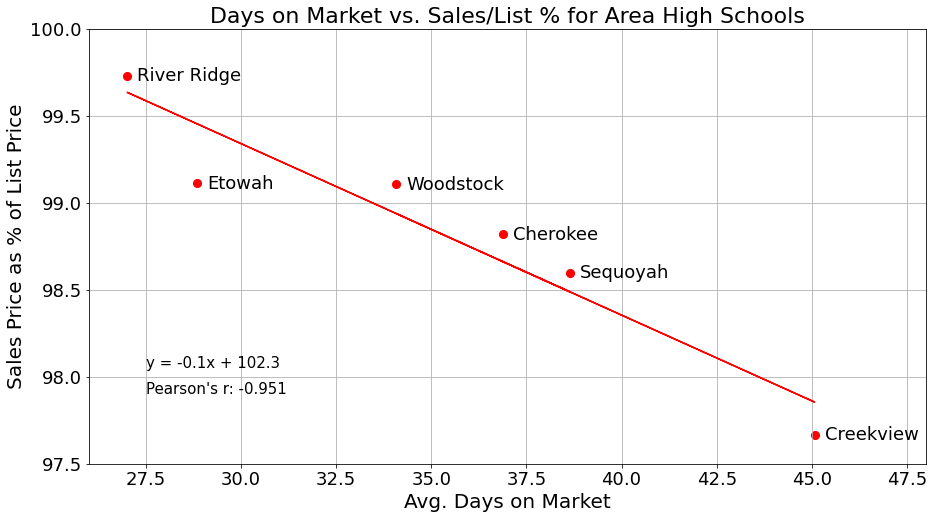

In [575]:
# Next I create a fresh, clean dataset from the last iteration of my dataset. Now we're ready
# to start charting
clean_df = int8_df.copy()

# Now, let's explore the time each home spent on the market vs. the delta between the list and
# the sales. We would expect that, as DOM gets smaller (i.e., the less amount of time it spent
# on the market), the delta would approach (or even exceed) 100. Another way of saying this is,
# buyers usually get what they ask for (or even more) the less time their home spends on the market.
mean_DOM_hs = clean_df.groupby('High Schl')['DOM_actual'].mean()
mean_delta_hs = clean_df.groupby('High Schl')['delta'].mean()

# Now I'll create the dataframe that stores the above lists and create a scatter
hs_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM_hs,
    "Avg. Delta":mean_delta_hs
    }
)

# As shown from the below scatter, a clear & strong correlation appears to exist between
# how long a home stays on the market and the percentage of list price for which it sells
ax1 = hs_df.plot.scatter(x='Avg. DOM', y='Avg. Delta', edgecolor='red',
                         marker='o', c='red', grid=True, figsize=(15,8), s=65)
ax1.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'black'})
ax1.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'black'})
ax1.tick_params(axis='x',colors='black',labelsize=18)
ax1.tick_params(axis='y',colors='black',labelsize=18)
ax1.set_title('Days on Market vs. Sales/List % for Area High Schools',
             fontdict = {'fontsize':22,'color':'black'})
# ax1.set_markeredgecolor('red')
ax1.set_xlim(26,48)
ax1.set_ylim(97.5,100)

# Set annotations labels for the scatter plot
for k, v in hs_df.iterrows():
    ax1.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='black')

# Add the linear regression equation and line to plot
x_values = hs_df['Avg. DOM']
y_values = hs_df['Avg. Delta']

# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw our regression line
plt.plot(x_values,regress_values, color='red')

# annotate on our figure the line equation in red
plt.annotate(line_eq,(27.5,98.05),fontsize=15,color="black")
plt.annotate(f"Pearson's r: {round(rvalue, 3)}",(27.5, 97.9), fontsize=15, color="black")
plt.savefig("Outputs/DOM_Delta_HS.png")

## DOM & Delta % (Middle Schools only)

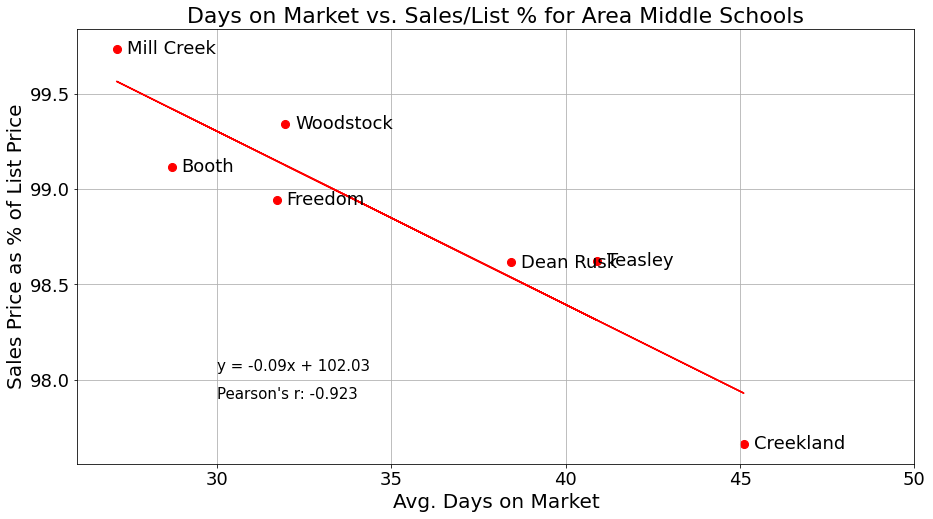

In [576]:
# How 'bout middle schools?
mean_DOM_ms = clean_df.groupby('Middle Schl')['DOM_actual'].mean()
mean_delta_ms = clean_df.groupby('Middle Schl')['delta'].mean()

ms_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM_ms,
    "Avg. Delta":mean_delta_ms
    }
)

ax2 = ms_df.plot.scatter(x='Avg. DOM', y='Avg. Delta',c='red',grid=True,figsize=(15,8),s=65)
ax2.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'black'})
ax2.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'black'})
ax2.tick_params(axis='x',colors='black',labelsize=18)
ax2.tick_params(axis='y',colors='black',labelsize=18)
ax2.set_title('Days on Market vs. Sales/List % for Area Middle Schools',
             fontdict = {'fontsize':22,'color':'black'})
ax2.set_xlim(26,50)

for k, v in ms_df.iterrows():
    ax2.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='black')
    
# Add the linear regression equation and line to plot
x_values = ms_df['Avg. DOM']
y_values = ms_df['Avg. Delta']

# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw our regression line
plt.plot(x_values,regress_values, color='red')

# annotate on our figure the line equation in red
plt.annotate(line_eq,(30,98.05),fontsize=15,color="black")
plt.annotate(f"Pearson's r: {round(rvalue, 3)}",(30, 97.9), fontsize=15, color="black")
plt.savefig("Outputs/DOM_Delta_MS.png")

## DOM & Delta % (Elementary Schools only)

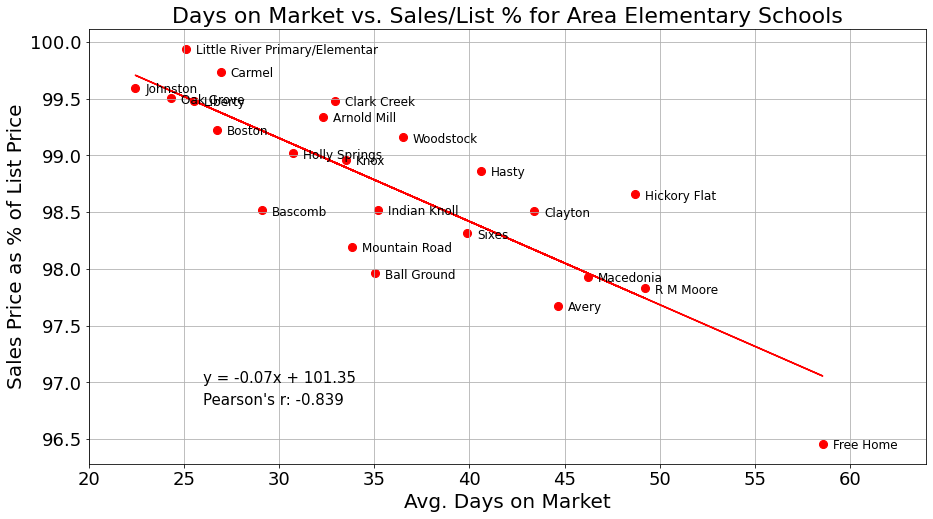

In [573]:
# How 'bout elementary schools?
mean_DOM_es = clean_df.groupby('Elem Schl')['DOM_actual'].mean()
mean_delta_es = clean_df.groupby('Elem Schl')['delta'].mean()

es_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM,
    "Avg. Delta":mean_delta
    }
)

ax3 = es_df.plot.scatter(x='Avg. DOM', y='Avg. Delta', c='red', grid=True, figsize=(15,8), s=65)
ax3.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'black'})
ax3.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'black'})
ax3.tick_params(axis='x',colors='black',labelsize=18)
ax3.tick_params(axis='y',colors='black',labelsize=18)
ax3.set_title('Days on Market vs. Sales/List % for Area Elementary Schools',
             fontdict = {'fontsize':22,'color':'black'})
ax3.set_xlim(20,64)

for k, v in es_df.iterrows():
    ax3.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=12, color='black')

# Add the linear regression equation and line to plot
x_values = es_df['Avg. DOM']
y_values = es_df['Avg. Delta']

# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw our regression line
plt.plot(x_values,regress_values, color='red')

# annotate on our figure the line equation in red
plt.annotate(line_eq,(26,97),fontsize=15,color="black")
plt.annotate(f"Pearson's r: {round(rvalue, 3)}",(26, 96.8), fontsize=15, color="black")
plt.savefig("Outputs/DOM_Delta_ES.png")

# School ratings

In [485]:
# High school ratings
high_ratings = {
    "Cherokee High": 5,
    "Creekview High": 8,
    "Etowah High": 8,
    "River Ridge High": 7,
    "Sequoyah High": 7,
    "Woodstock High": 6
}

# Middle school ratings
middle_ratings = {
    "Booth Middle": 6,
    "Creekland Middle": 7,
    "Dean Rusk Middle": 7,
    "Freedom Middle": 6,
    "Mill Creek Middle": 7,
    "Teasley Middle": 4,
    "Woodstock Middle": 6
}

# Elementary school ratings
elem_ratings = {
    "Little River Elem": 7,
    "Arnold Mill Elem": 7,
    "Avery Elem": 8,
    "Ball Ground Elem": 5,
    "Bascomb Elem": 8,
    "Boston Elem": 7,
    "Carmel Elem": 5,
    "Clark Creek Elem": 7,
    "Clayton Elem": 5,
    "Free Home Elem": 5,
    "Hasty Elem": 5,
    "Hickory Flat Elem": 7,
    "Holly Springs Elem": 7,
    "Indian Knoll Elem": 6,
    "Johnston Elem": 5,
    "Knox Elem": 5,
    "Liberty Elem": 8,
    "Macedonia Elem": 7,
    "Mountain Road Elem": 8,
    "Oak Grove Elem": 5,
    "R M Moore Elem": 4,
    "Sixes Elem": 7,
    "Woodstock Elem": 7
}

In [490]:
# Add the word "High" to each school in the "High Schl" column, so on so forth
clean_df = int8_df.copy()
clean_df['High Schl'] =  clean_df['High Schl'].astype(str) + ' High'
clean_df['Middle Schl'] =  clean_df['Middle Schl'].astype(str) + ' Middle'
clean_df['Elem Schl'] =  clean_df['Elem Schl'].astype(str) + ' Elem'

In [491]:
# Here's where we split our cleaned dataset into 2 sections: pre-COVID and COVID Era
pre_Covid_df = clean_df.loc[clean_df['Clsd Date'] < '03/11/2020'] 
Covid_era_df = clean_df.loc[clean_df['Clsd Date'] >= '03/11/2020']

In [557]:
# Start off with pre-Covid sales. Use the .map() function to add in the school
# ratings for each school type. We'll combine everything later.
elem_df1 = pre_Covid_df.groupby('Elem Schl')[['delta','DOM_actual']].mean()
elem_df1['Rating'] = elem_df1.index.map(elem_ratings)

middle_df1 = pre_Covid_df.groupby('Middle Schl')[['delta','DOM_actual']].mean()
middle_df1['Rating'] = middle_df1.index.map(middle_ratings)

high_df1 = pre_Covid_df.groupby('High Schl')[['delta','DOM_actual']].mean()
high_df1['Rating'] = high_df1.index.map(high_ratings)

# Now add all dataframes together
df1 = middle_df1.append(elem_df1)
df2 = df1.append(high_df1)

# Create labels for our x axis
xlabels = [4,5,6,7,8]

# This will create a series for each rating, returning only the 'delta' variable
r_4_delta = df2.loc[df2['Rating'] == 4,'delta']
r_5_delta = df2.loc[df2['Rating'] == 5,'delta']
r_6_delta = df2.loc[df2['Rating'] == 6,'delta']
r_7_delta = df2.loc[df2['Rating'] == 7,'delta']
r_8_delta = df2.loc[df2['Rating'] == 8,'delta']

# Now do the same for the other success factor, days on the market
r_4_DOM = df2.loc[df2['Rating'] == 4,'DOM_actual']
r_5_DOM = df2.loc[df2['Rating'] == 5,'DOM_actual']
r_6_DOM = df2.loc[df2['Rating'] == 6,'DOM_actual']
r_7_DOM = df2.loc[df2['Rating'] == 7,'DOM_actual']
r_8_DOM = df2.loc[df2['Rating'] == 8,'DOM_actual']

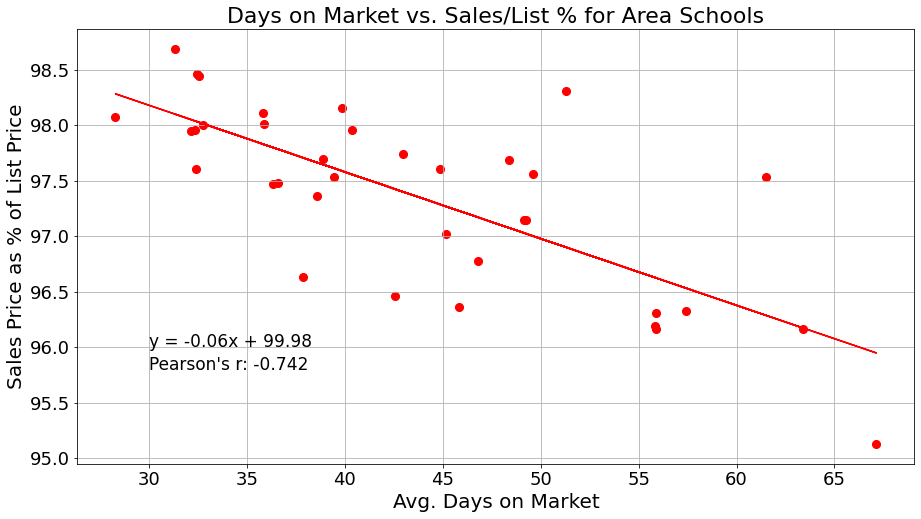

In [577]:
# Create a scatter of our 2 success factors for all schools
ax = df2.plot.scatter(x='DOM_actual', y='delta', c='red', grid=True, figsize=(15,8), s=65)
ax.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'black'})
ax.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'black'})
ax.tick_params(axis='x',colors='black',labelsize=18)
ax.tick_params(axis='y',colors='black',labelsize=18)
ax.set_title('Days on Market vs. Sales/List % for Area Schools',
             fontdict = {'fontsize':22,'color':'black'})


# Add the linear regression equation and line to plot
x_values = df2['DOM_actual']
y_values = df2['delta']

# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw our regression line
plt.plot(x_values,regress_values, color='red')

# annotate on our figure the line equation in red
plt.annotate(line_eq,(30,96),fontsize=17,color="black")
plt.annotate(f"Pearson's r: {round(rvalue, 3)}",(30, 95.8), fontsize=17, color="black")
plt.savefig("Outputs/Success_factors.png")
plt.show()

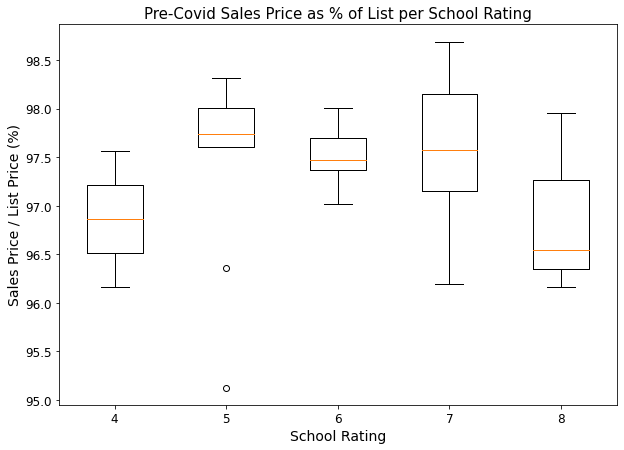

In [544]:
# Create boxplot for the first success factor (pre-Covid sales only)
plt.figure(figsize=(10, 7))
plt.boxplot([r_4_delta, r_5_delta, r_6_delta, r_7_delta, r_8_delta],
           labels=[4,5,6,7,8])

# Set title
plt.title("Pre-Covid Sales Price as % of List per School Rating",
         fontdict={
             'fontsize':15,
             'color':'black'})

# Set y-axis configuration
plt.ylabel("Sales Price / List Price (%)",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='y',colors='black',labelsize=12)

# Set x-axis configuration
plt.xlabel("School Rating",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='x',colors='black',labelsize=12)

plt.savefig("Outputs/Pre_Delta.png")
plt.show()

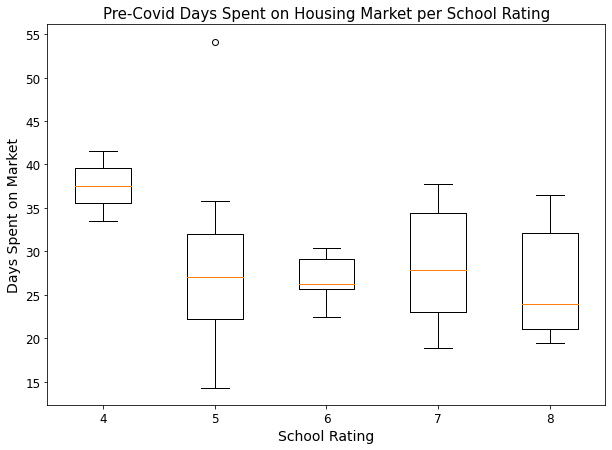

In [552]:
# Create boxplot for the second success factor (pre-Covid sales only)
plt.figure(figsize=(10, 7))
plt.boxplot([r_4_DOM, r_5_DOM, r_6_DOM, r_7_DOM, r_8_DOM],
           labels=[4,5,6,7,8])

# Set title
plt.title("Pre-Covid Days Spent on Housing Market per School Rating",
         fontdict={
             'fontsize':15,
             'color':'black'})

# Set y-axis configuration
plt.ylabel("Days Spent on Market",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='y',colors='black',labelsize=12)

# Set x-axis configuration
plt.xlabel("School Rating",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='x',colors='black',labelsize=12)

plt.savefig("Outputs/Pre_DOM.png")
plt.show()

In [550]:
# Now we look at Covid-era sales. Use the .map() function to add in the school
# ratings for each school type. We'll combine everything later.
elem_df2 = Covid_era_df.groupby('Elem Schl')[['delta','DOM_actual']].mean()
elem_df2['Rating'] = elem_df2.index.map(elem_ratings)

middle_df2 = Covid_era_df.groupby('Middle Schl')[['delta','DOM_actual']].mean()
middle_df2['Rating'] = middle_df2.index.map(middle_ratings)

high_df2 = Covid_era_df.groupby('High Schl')[['delta','DOM_actual']].mean()
high_df2['Rating'] = high_df2.index.map(high_ratings)

# Now add all dataframes together
df3 = middle_df2.append(elem_df2)
df4 = df3.append(high_df2)

# Create labels for our x axis
xlabels = [4,5,6,7,8]

# This will create a series for each rating, returning only the 'delta' variable
r_4_delta = df4.loc[df2['Rating'] == 4,'delta']
r_5_delta = df4.loc[df2['Rating'] == 5,'delta']
r_6_delta = df4.loc[df2['Rating'] == 6,'delta']
r_7_delta = df4.loc[df2['Rating'] == 7,'delta']
r_8_delta = df4.loc[df2['Rating'] == 8,'delta']

# Now do the same for the other success factor, days on the market
r_4_DOM = df4.loc[df2['Rating'] == 4,'DOM_actual']
r_5_DOM = df4.loc[df2['Rating'] == 5,'DOM_actual']
r_6_DOM = df4.loc[df2['Rating'] == 6,'DOM_actual']
r_7_DOM = df4.loc[df2['Rating'] == 7,'DOM_actual']
r_8_DOM = df4.loc[df2['Rating'] == 8,'DOM_actual']

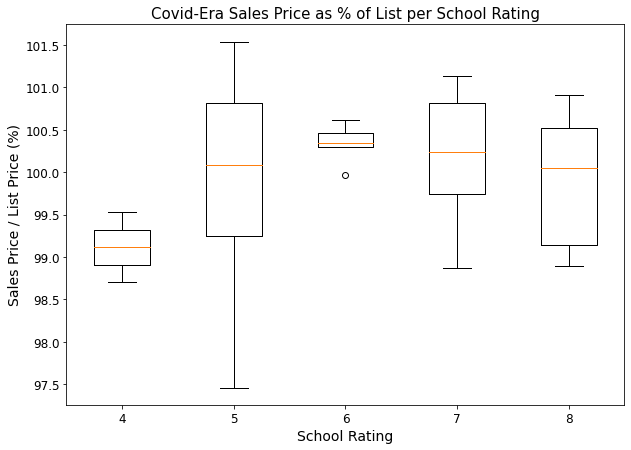

In [551]:
# Create boxplot for the first success factor (Covid-era sales only)
plt.figure(figsize=(10, 7))
plt.boxplot([r_4_delta, r_5_delta, r_6_delta, r_7_delta, r_8_delta],
           labels=[4,5,6,7,8])

# Set title
plt.title("Covid-Era Sales Price as % of List per School Rating",
         fontdict={
             'fontsize':15,
             'color':'black'})

# Set y-axis configuration
plt.ylabel("Sales Price / List Price (%)",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='y',colors='black',labelsize=12)

# Set x-axis configuration
plt.xlabel("School Rating",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='x',colors='black',labelsize=12)

plt.savefig("Outputs/CovidEra_Delta.png")
plt.show()

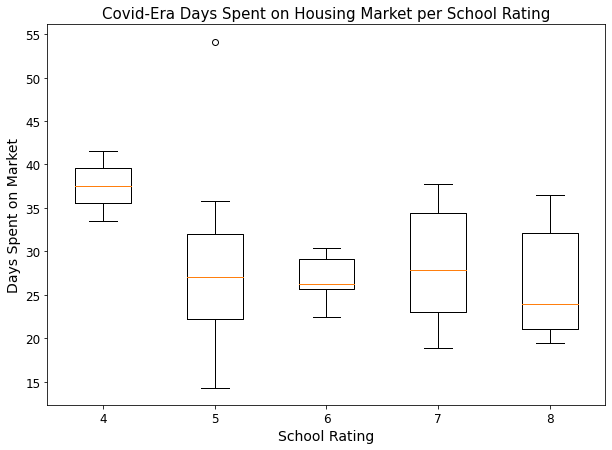

In [554]:
# Create boxplot for the second success factor (Covid-era sales only)
plt.figure(figsize=(10, 7))
plt.boxplot([r_4_DOM, r_5_DOM, r_6_DOM, r_7_DOM, r_8_DOM],
           labels=[4,5,6,7,8])

# Set title
plt.title("Covid-Era Days Spent on Housing Market per School Rating",
         fontdict={
             'fontsize':15,
             'color':'black'})

# Set y-axis configuration
plt.ylabel("Days Spent on Market",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='y',colors='black',labelsize=12)

# Set x-axis configuration
plt.xlabel("School Rating",
          fontdict={
              'fontsize':14,
              'color':'black'
          })
plt.tick_params(axis='x',colors='black',labelsize=12)

plt.savefig("Outputs/CovidEra_DOM.png")
plt.show()